# Zero correlation model

$$ r_{i} (t,\tau) = \log m_{i}(t + \tau) - \log m_{i}(t) = \log \frac{m_{i}(t + \tau)}{m_{i}(t)} $$
$$ R_{ij}^{(exc. 0)}(\tau) = \left \langle r_i(t,\tau) \, \epsilon_{j} (t) \right \rangle_t^{(exc. 0)} $$

where

$$ \epsilon_{j}(t) = \text{random number} \in {-1, 1} $$

In [1]:
# Import modules

from matplotlib import pyplot as plt
import numpy as np
import pickle

%matplotlib inline

In [6]:
def zero_correlation_plot(days, t_step):
        
    plt.figure(figsize=(9,16))
    plt.subplots_adjust(hspace = 0, wspace = 0)

    for d, day in enumerate(days):
        plot = pickle.load(open('../Data/zero_correlation_data_{}ms/zero_correlation_201603{}_{}i_rand_{}ms.pickl'
            .format(t_step, day, ticker_i, t_step), 'rb'))

        plt.subplot(5,1,d+1)
        plt.semilogx(plot, '-g', label='Stock i {} and random trade sign - {}'.format(ticker_i, day))
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Self response random $ R_{ii} (\tau)_{rand} $')
        plt.xlim
        plt.legend(loc='best')
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        plt.grid(True)
        plt.tight_layout()
        
    #plt.savefig('../Data/nullmodell_data_%dms/nullmodell%d.png' % (t_step, n))

In [7]:
# Using the only two common stocks in both data sets
ticker_i = 'AAPL'
days = ['07','08','09','10','11']
tau_val = 1000
t_step = 1000

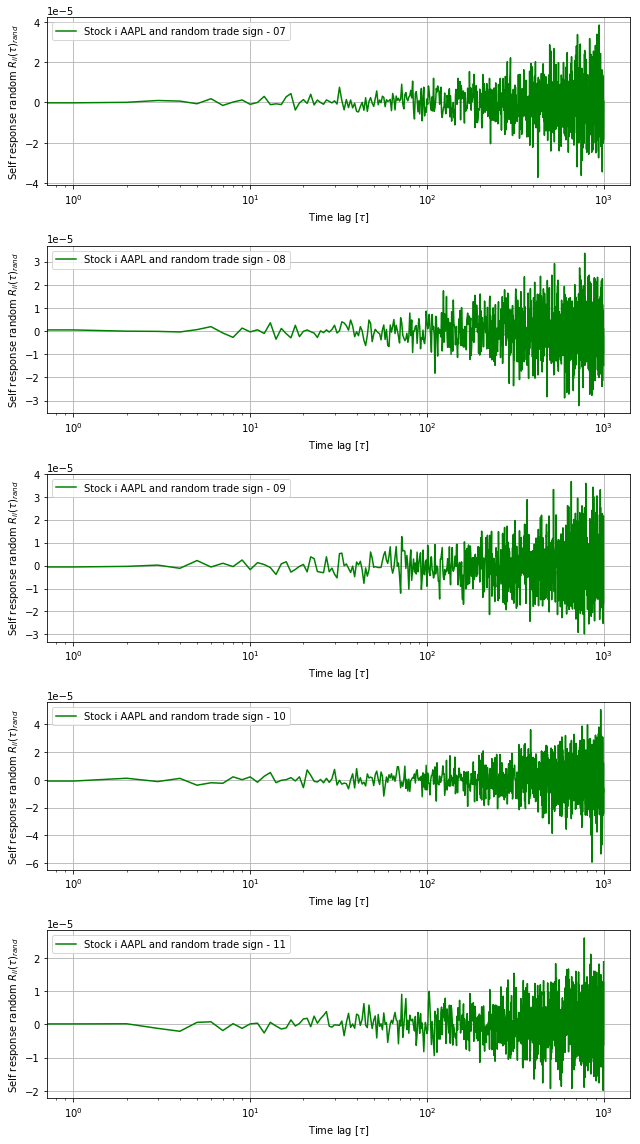

In [8]:
zero_correlation_plot(days, t_step)